# Lab2 - Workload

## Creating workload

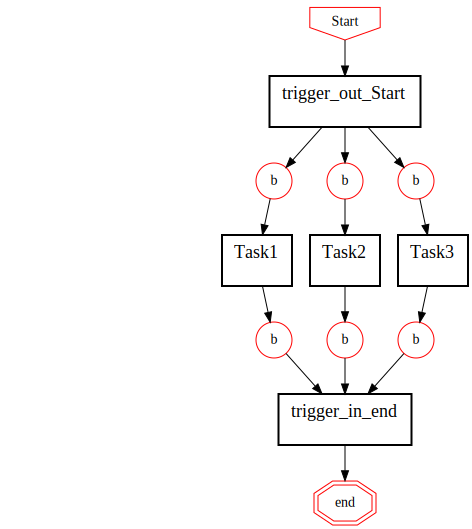

In [1]:
from asap.workload import Workload, Task, TYPES

workload = Workload('Workload')

# Tasks creation
start = Task('Start', TYPES.START)
task1 = Task('Task1', TYPES.PROC, processing_cycles=1000)
task2 = Task('Task2', TYPES.PROC, processing_cycles=1000)
task3 = Task('Task3', TYPES.PROC, processing_cycles=1000)

workload.add_tasks([start, task1, task2, task3])
end = Task('end', TYPES.END)
workload.add_task(end)

workload.connect_tasks('con1', start, task1)
workload.connect_tasks('con2', start, task2)
workload.connect_tasks('con3', start, task3)
workload.connect_tasks('con4', task1, end)
workload.connect_tasks('con5', task2, end)
workload.connect_tasks('con6', task3, end)
workload


### Modifying workload as following:
#### - Add Task4 triggered by Task2 and Task3
#### - Add Task5 triggered by Task1 and Task4
#### - Connect Task5 to End task

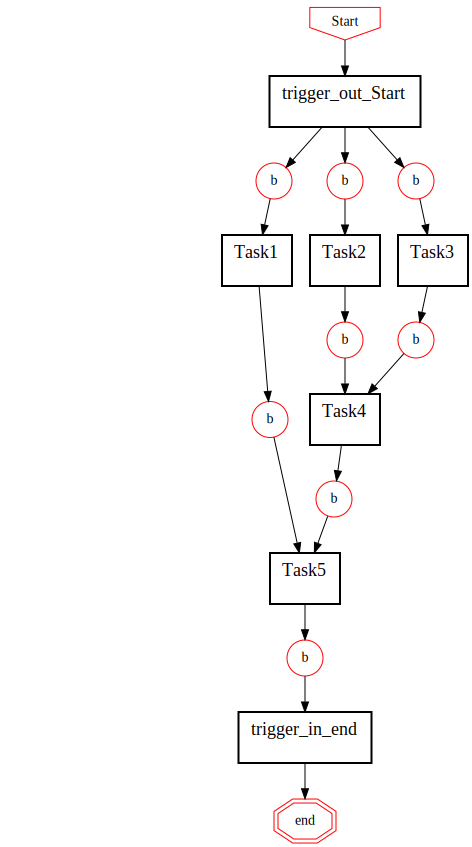

In [2]:
task4 = Task('Task4', TYPES.PROC, processing_cycles=2200)
task5 = Task('Task5', TYPES.PROC, processing_cycles=800)

workload.add_tasks([task4, task5])
workload.disconnect_tasks(task1, end)
workload.disconnect_tasks(task2, end)
workload.del_connection('con6')

workload.connect_tasks('con7', task2, task4)
workload.connect_tasks('con8', task3, task4)
workload.connect_tasks('con9', task4, task5)
workload.connect_tasks('con10', task1, task5)
workload.connect_tasks('con11', task5, end)

workload


### Running simulation

In [3]:
from speedsim import SpeedSim

sim = SpeedSim(None, workload, None)
res = sim.simulate()
res

,START,FINISH,TRANSITION,RESOURCE,RESOURCE_IDX,DURATION
0,0.0,10.0,Task1,NULL,0,10.0
1,0.0,10.0,Task2,NULL,0,10.0
2,0.0,10.0,Task3,NULL,0,10.0
3,10.0,32.0,Task4,NULL,0,22.0
4,32.0,40.0,Task5,NULL,0,8.0


#### Unmapped results

In [4]:
from bokeh.plotting import show, output_notebook
output_notebook()
from post_processing.utils import create_task_analysis_fig

fig = create_task_analysis_fig(res)
show(fig)

Loading BokehJS ...

### Creating mapping

##### retrieving platform from first lab

In [5]:
from labs.lab1_creating_platform import create_platform_step_by_step
from asap.mapping import Mapping

sys_platform = create_platform_step_by_step()
mapping = Mapping('mapping', workload)

gt = sys_platform.get_ip('GT')
cpu1 = sys_platform.get_ip('CPU1')
cpu2 = sys_platform.get_ip('CPU2')

mapping.map_task(task1, gt)
mapping.map_task(task2, cpu1)
mapping.map_task(task3, cpu1)
mapping.map_task(task4, cpu2)
mapping.map_task(task5, gt)

sim = SpeedSim(sys_platform, workload, mapping)
res = sim.simulate()
res


Validating System platform: MTL...
System platform is valid!


,START,FINISH,TRANSITION,RESOURCE,RESOURCE_IDX,DURATION
0,0.0,10.0,Task1,GT/ex_ug,0,10.0
1,0.0,10.0,Task2,CPU1/ex_u1,0,10.0
2,10.0,20.0,Task3,CPU1/ex_u1,0,10.0
3,20.0,42.0,Task4,CPU2/ex_u2,0,22.0
4,42.0,50.0,Task5,GT/ex_ug,0,8.0


In [6]:
from bokeh.plotting import show, output_notebook
output_notebook()
from post_processing.utils import create_task_analysis_fig

fig = create_task_analysis_fig(res)
show(fig)

Loading BokehJS ...